# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\23843451.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
df1=df.groupby('Year').agg('mean')
df1

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


In [4]:
climate_variables = df1.columns.tolist()

--- Univariate Analysis for Global Average Temperature (°C) ---
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64 



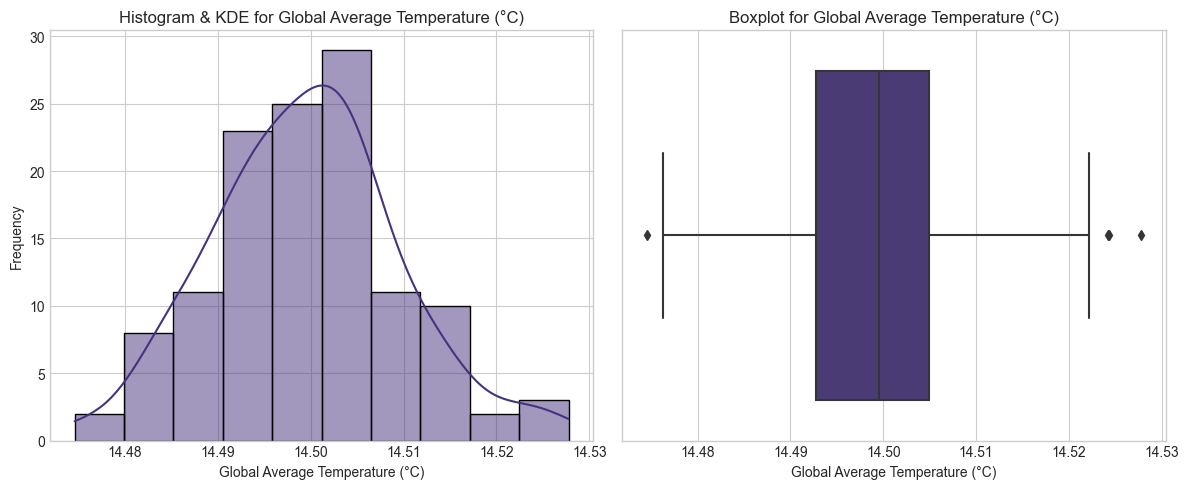

--- Univariate Analysis for CO2 Concentration (ppm) ---
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64 



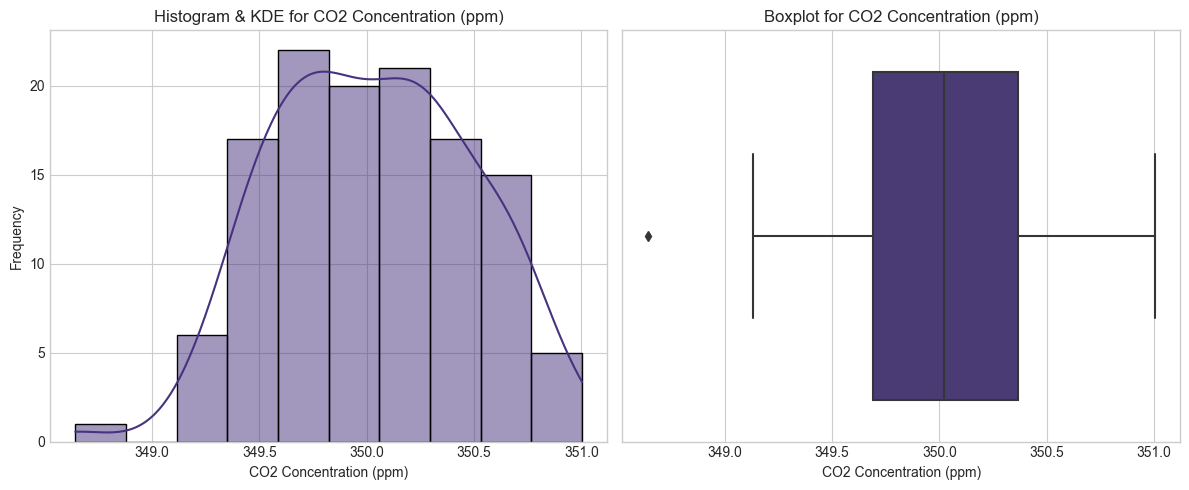

--- Univariate Analysis for Sea Level Rise (mm) ---
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64 



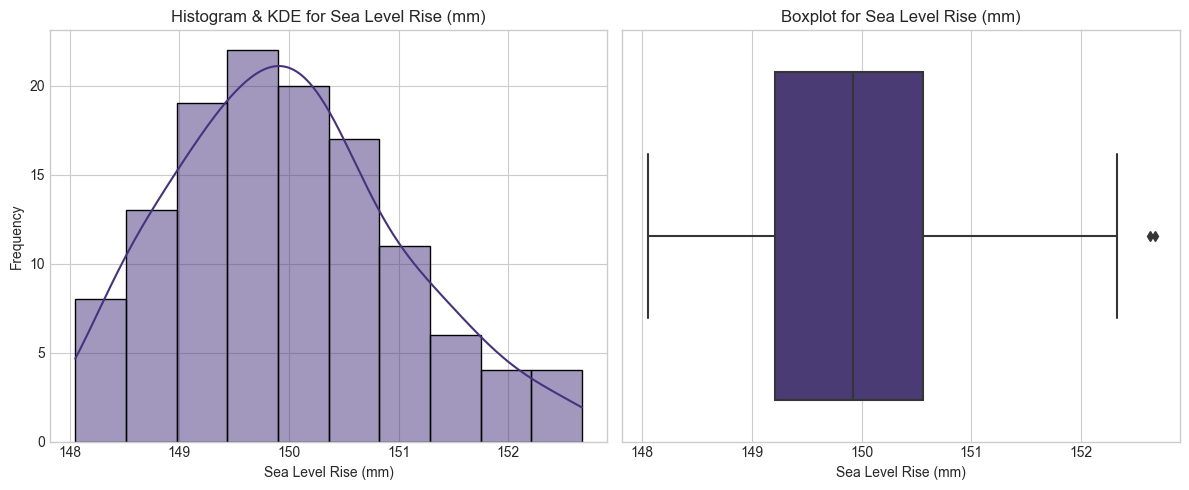

--- Univariate Analysis for Arctic Ice Area (million km²) ---
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64 



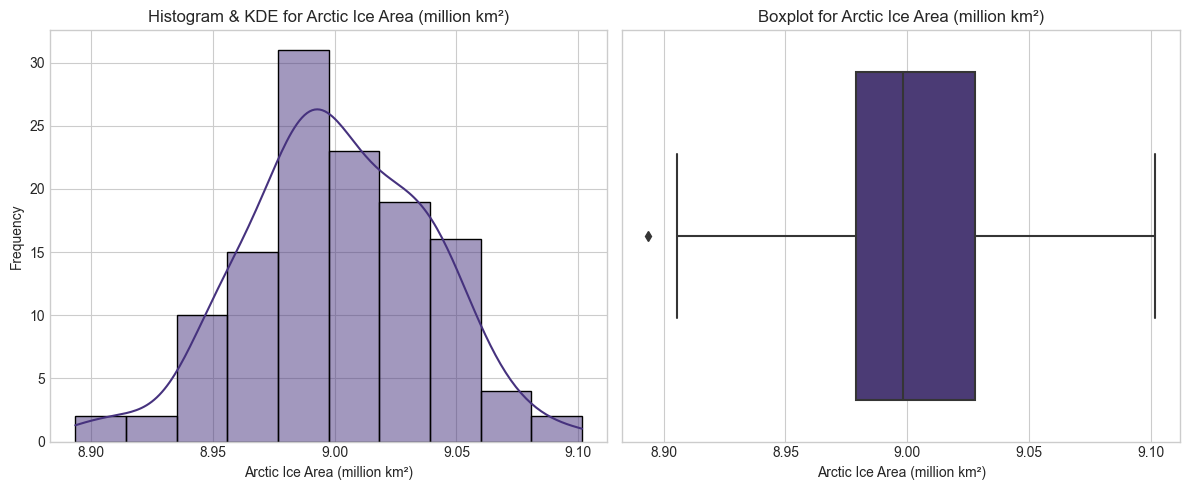

In [5]:
climate_variables = df1.columns.tolist()
for variable in climate_variables:
    print(f"--- Univariate Analysis for {variable} ---")
    # Descriptive statistics
    print(df1[variable].describe(), "\n")
    
    # Create subplots for histogram (with KDE) and boxplot
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], kde=True, bins=10)
    plt.title(f'Histogram & KDE for {variable}')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[variable])
    plt.title(f'Boxplot for {variable}')
    plt.xlabel(variable)
    
    plt.tight_layout()
    plt.show()

--- Univariate Analysis for Year ---
count    1.048576e+06
mean     1.961505e+03
std      3.579736e+01
min      1.900000e+03
25%      1.930000e+03
50%      1.962000e+03
75%      1.993000e+03
max      2.023000e+03
Name: Year, dtype: float64 



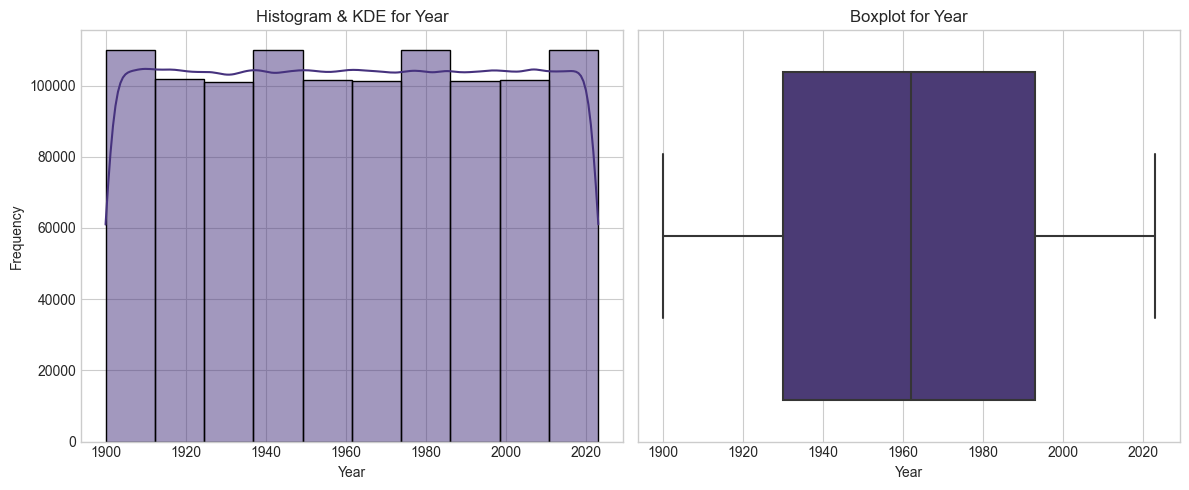

--- Univariate Analysis for Global Average Temperature (°C) ---
count    1.048576e+06
mean     1.449954e+01
std      8.661005e-01
min      1.300000e+01
25%      1.375000e+01
50%      1.450000e+01
75%      1.525000e+01
max      1.600000e+01
Name: Global Average Temperature (°C), dtype: float64 



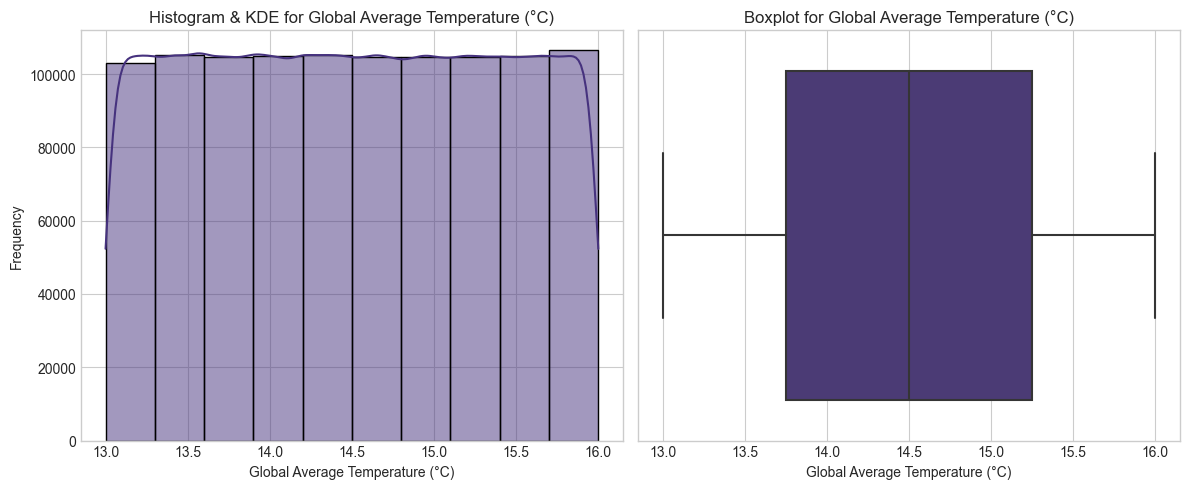

--- Univariate Analysis for CO2 Concentration (ppm) ---
count    1.048576e+06
mean     3.500280e+02
std      4.042409e+01
min      2.800000e+02
25%      3.149900e+02
50%      3.500700e+02
75%      3.850200e+02
max      4.200000e+02
Name: CO2 Concentration (ppm), dtype: float64 



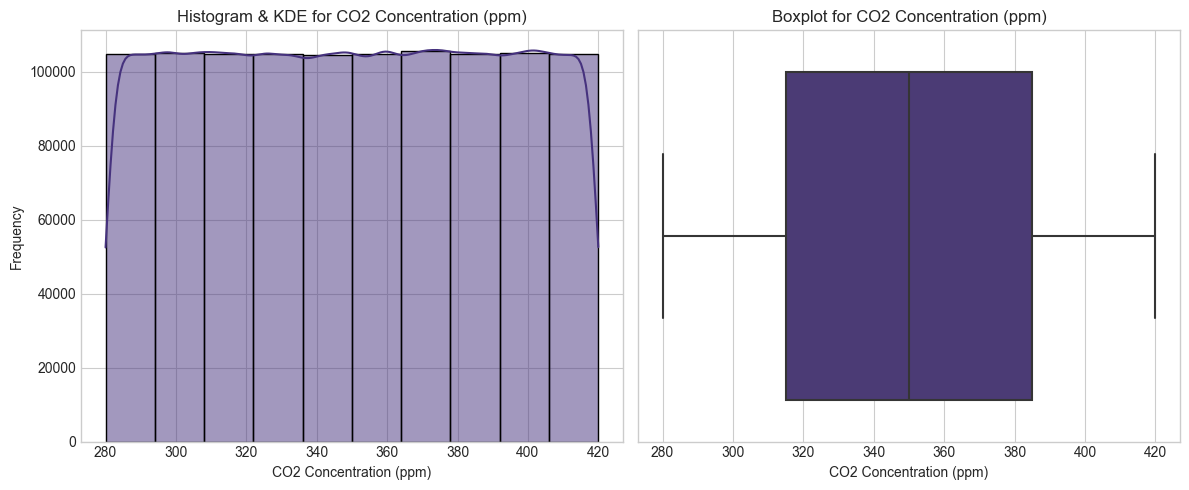

--- Univariate Analysis for Sea Level Rise (mm) ---
count    1.048576e+06
mean     1.499900e+02
std      8.657659e+01
min      0.000000e+00
25%      7.497000e+01
50%      1.500200e+02
75%      2.249300e+02
max      3.000000e+02
Name: Sea Level Rise (mm), dtype: float64 



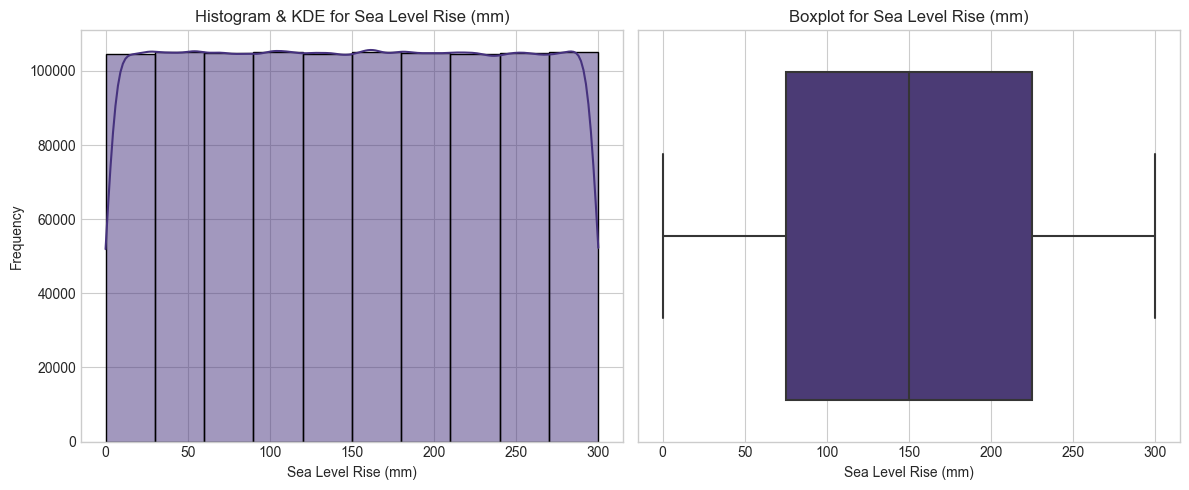

--- Univariate Analysis for Arctic Ice Area (million km²) ---
count    1.048576e+06
mean     9.000896e+00
std      3.462551e+00
min      3.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.200000e+01
max      1.500000e+01
Name: Arctic Ice Area (million km²), dtype: float64 



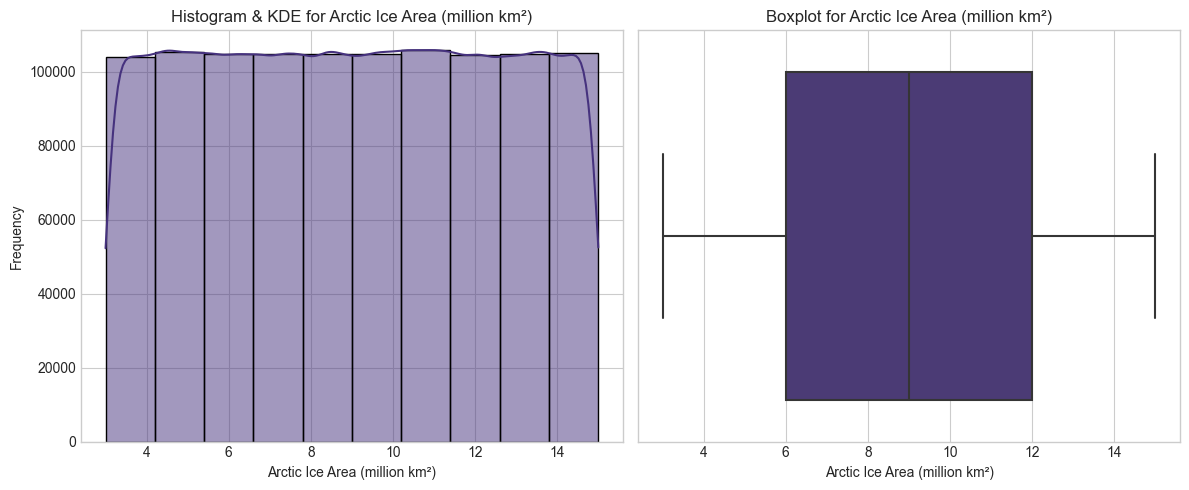

In [6]:
def univariate_analysis(df1):
    """
    Perform univariate analysis on each numeric column in the DataFrame.
    Displays summary statistics, histograms, and boxplots.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numeric columns to analyze.
    """
    # Ensure df has only numeric columns (excluding non-numeric)
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

    for column in numeric_columns:
        print(f"--- Univariate Analysis for {column} ---")
        
        # Descriptive Statistics
        print(df[column].describe(), "\n")

        # Create subplots for histogram with KDE and boxplot
        plt.figure(figsize=(12, 5))
        
        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=10)
        plt.title(f'Histogram & KDE for {column}')
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel(column)
        
        plt.tight_layout()
        plt.show()
        
        
univariate_analysis(df1)

In [41]:
# Group by 'Year' and calculate mean for each group
# aggregated_df = df.groupby('Year').agg({
#     "Global Average Temperature (°C)": "mean",
#     "CO2 Concentration (ppm)": "mean",
#     "Sea Level Rise (mm)": "mean",
#     "Arctic Ice Area (million km²)": "mean"
# }).reset_index()

# Round numeric columns to 2 decimal places
# aggregated_df = aggregated_df.round(2)

# # Display the first two rows of the aggregated DataFrame
# aggregated_df.head(2)


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1966,13.94,302.38,191.00,11.92
1,1992,13.15,354.52,14.84,11.23


In [25]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [ ]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here